In [1]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

Load data

In [2]:
bank_data = pd.read_csv("data/bank_interest_model.csv")
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   interest_rate               2498 non-null   float64
 1   fico_range                  2498 non-null   object 
 2   amount_requested            2498 non-null   float64
 3   amount_funded_by_investors  2498 non-null   float64
 4   loan_length                 2498 non-null   float64
dtypes: float64(4), object(1)
memory usage: 97.7+ KB


Identified that there is a single column with 'Object' type (fico_range). For better EDA experience, we change it to integer.

In [3]:
bank_data['fico_range'] = bank_data['fico_range'].apply(lambda x: sum(map(int, x.split('-'))) / 2.0)

In [4]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   interest_rate               2498 non-null   float64
 1   fico_range                  2498 non-null   float64
 2   amount_requested            2498 non-null   float64
 3   amount_funded_by_investors  2498 non-null   float64
 4   loan_length                 2498 non-null   float64
dtypes: float64(5)
memory usage: 97.7 KB


The first step for building a linear regression model:
- define the target variableand the feature variables

In [5]:
X = bank_data[['fico_range', 'amount_requested', 'amount_funded_by_investors', 'loan_length']] # Because we're choosing all columns
y = bank_data['interest_rate']

Splitting the data for testing set and train set. We're giving 20% to the testing set.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

We need to build a linear model. I'm going to name it as bank_model.

In [7]:
bank_model = LinearRegression()

Now, we need to fit the model. In other words, train the data with the linear regression.

In [8]:
bank_model.fit(X_train, y_train)


LinearRegression()

Imagine that training has been completed. Now, we're going to make predictions on testing data.

In [9]:
y_pred = bank_model.predict(X_test)
                                      # And remember, we're predicting the y value.


Final stage. Evaluation. We need to evaluate the model with mean squared error and R-squared. I'm pretty sure there are more tools, but we learned those two.

In [25]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [26]:
print("Yo, Mean Squared Error is", mse)
print("Yo, R-Squared is", r2)

Yo, Mean Squared Error is 4.219335606231251
Yo, R-Squared is 0.7542869820079117


ValueError: x and y must be the same size

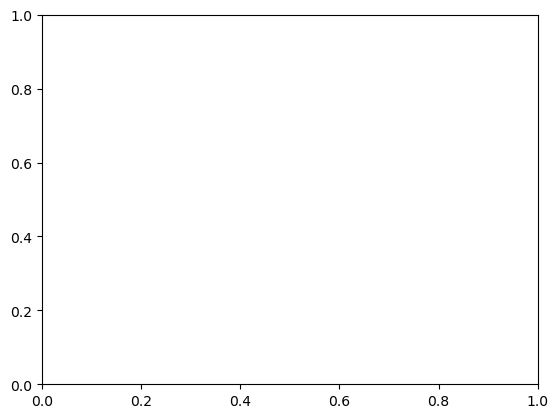

In [27]:
# Scatter plot of actual data points
plt.scatter(X_test, y_test, label='Data Points', alpha=0.5)

# Linear regression line
plt.plot(y_test, y_test, color='red', label='Linear Regression')

plt.legend()
plt.show()

Mean Squared Error is 4.219335606231251
R-squared is 0.7542869820079117


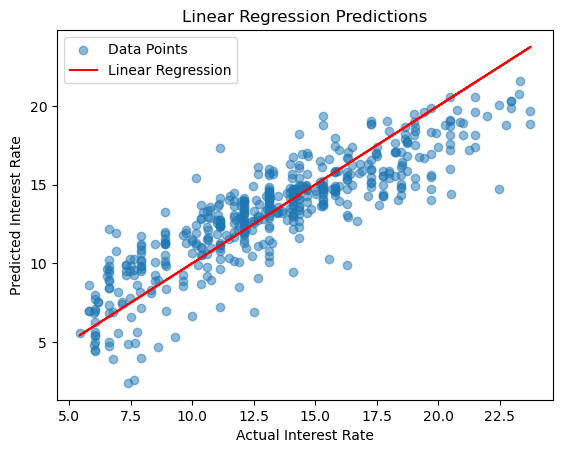

In [48]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Get the predictor variables (all columns except 'interest_rate')
X = bank_data.drop(columns=['interest_rate'])

# Get the target variable 'interest_rate'
y = bank_data['interest_rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Build a linear regression model
bank_model = LinearRegression()

# Train the model on the training data
bank_model.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred = bank_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error is {mse}")
print(f"R-squared is {r_squared}")

# Scatter plot of actual vs predicted interest rates
plt.scatter(y_test, y_pred, label='Data Points', alpha=0.5)

plt.plot(y_test, y_test, color='red', label='Linear Regression')

plt.xlabel('Actual Interest Rate')
plt.ylabel('Predicted Interest Rate')
plt.title('Linear Regression Predictions')
plt.legend()
plt.show()


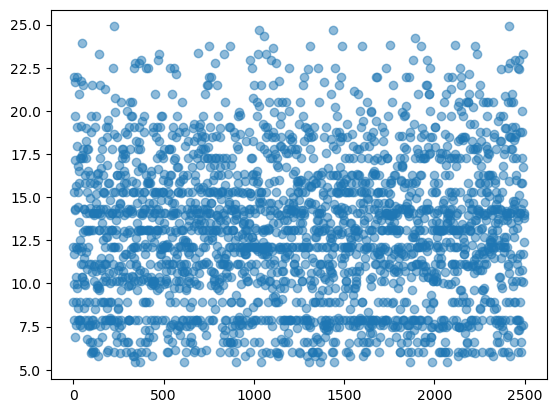

In [68]:
X=np.arange(0,len(X),1)
plt.scatter(X,y,alpha=0.5)

In [69]:
print(X.shape)
print(y.shape)

(2498,)
(2498,)


Now, we're going to analyze data between the fico_range and interest_rate. Because as you can see, fico_range seems to be only one that related to the interest_rate.

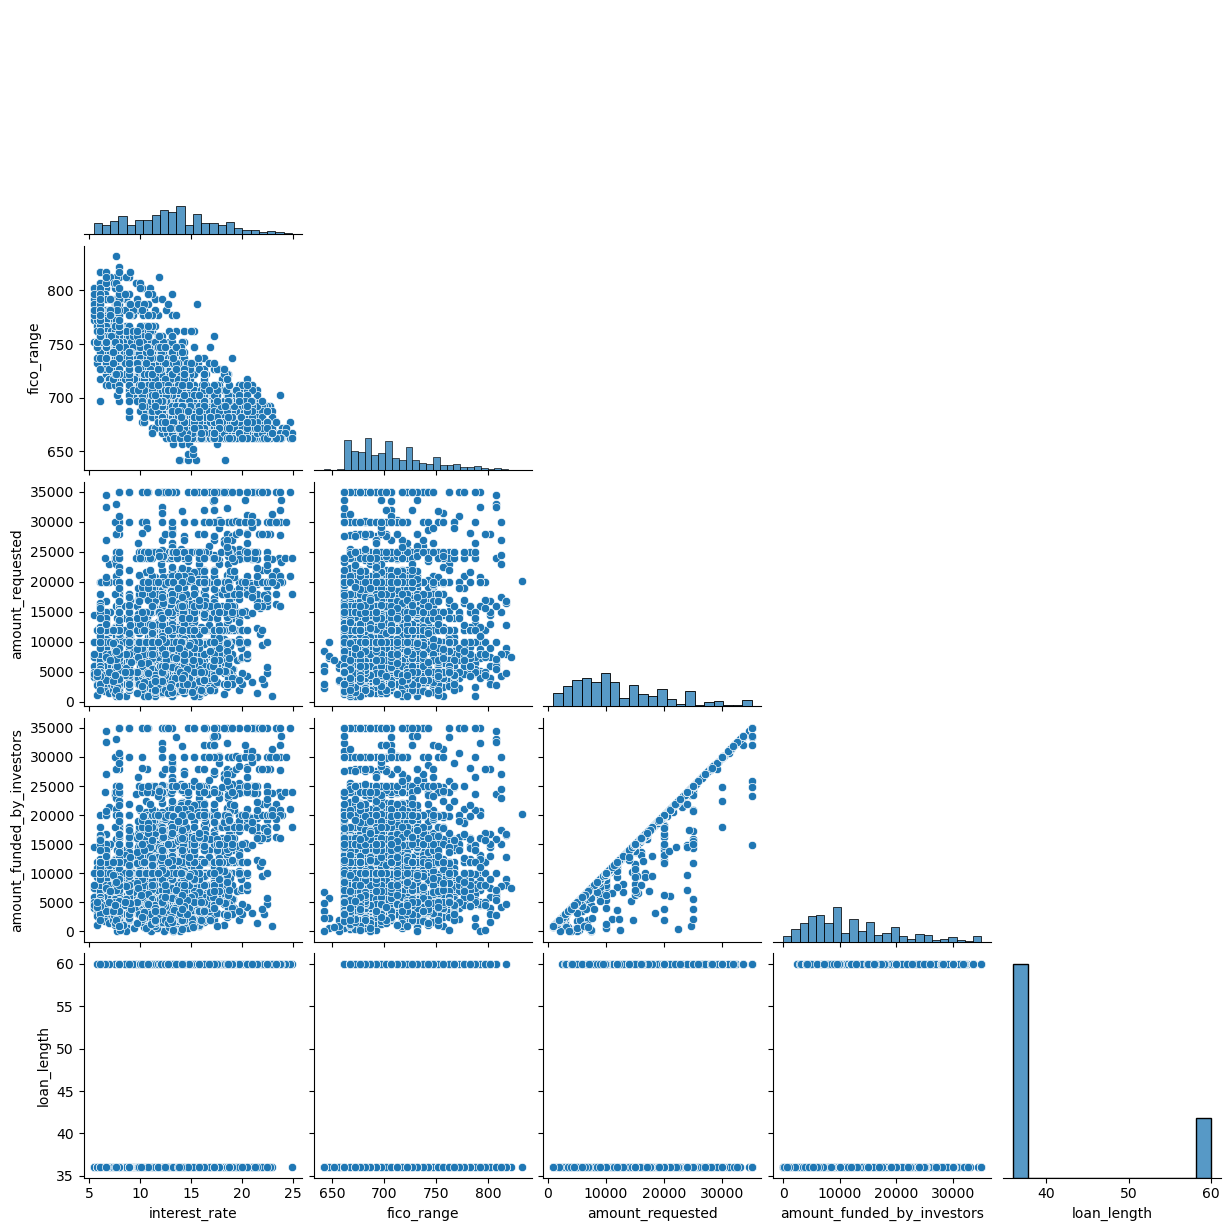

In [14]:
sns.pairplot(data=bank_data, corner=True)

In [15]:
X1 = bank_data['fico_range'].values.reshape(-1, 1)  # Reshaped to a 2D array
y1 = bank_data['interest_rate']

# Check the name variables. I added 1.

# Split!
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=0)

# Build a model!
fico_model = LinearRegression()

# Train!
fico_model.fit(X_train1, y_train1)

# Predict!
y_pred1 = fico_model.predict(X_test1)

# Evaluate!
mse1 = mean_squared_error(y_test1, y_pred1)
r_squared1 = r2_score(y_test1, y_pred1)

print(f"Mean Squared Error is {mse1}")
print(f"R-squared is {r_squared1}")

# Get the slope and intercept too. 
slope1 = fico_model.coef_[0]
intercept1 = fico_model.intercept_

print(f"Slope is {slope1}")
print(f"Intercept is {intercept1}")


Mean Squared Error is 9.052516461405437
R-squared is 0.47282668463962896
Slope is -0.08478758361430302
Intercept is 73.03589469989547


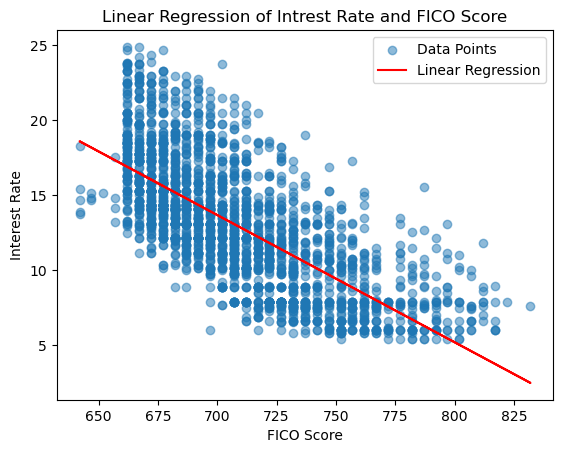

In [16]:
import matplotlib.pyplot as plt

# Scatter plot of actual data points
plt.scatter(X1, y1, label='Data Points', alpha=0.5)

# Linear regression line
plt.plot(X_test1, y_pred1, color='red', label='Linear Regression')
plt.xlabel('FICO Score')
plt.ylabel('Interest Rate')
plt.title('Linear Regression of Intrest Rate and FICO Score')
plt.legend()
plt.show()
